In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import utils
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [5]:
df = utils.load_suicide_healthcare_gini_df()
# transform text columns to categories (all unordered, since ordered=False by default)
df.country = pd.Categorical(df.country).codes
df.continent = pd.Categorical(df.continent).codes
df.sex = pd.Categorical(df.sex).codes
df.age = pd.Categorical(df.age).codes
# ordering needed!
# categories = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',
#                 '55-74 years', '75+ years']
# df.age = pd.Categorical(df.age, categories=categories, ordered=True).codes

In [3]:
a = df.describe()
a.to_csv('describe.csv')
a

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_per_capita,continent,healthcare_coverage,gini
count,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000,2064.0000000000
mean,16.4651162791,2012.3953488372,0.5000000000,2.5000000000,342.5232558140,2780080.6254844964,13.8181637597,39417.5872093023,1.1802325581,97.7494186047,33.4145348837
std,9.4198532204,1.6798245859,0.5001211681,1.7082389954,1007.1478595016,5294245.6709584603,17.1517172500,23203.0126182241,0.8264159952,3.7178089507,6.8929155659
min,0.0000000000,2010.0000000000,0.0000000000,0.0000000000,0.0000000000,7930.0000000000,0.0000000000,6552.0000000000,0.0000000000,82.4000000000,24.9000000000
25%,8.7500000000,2011.0000000000,0.0000000000,1.0000000000,15.0000000000,351098.2500000000,2.6200000000,17972.2500000000,1.0000000000,96.0000000000,27.8000000000
50%,16.0000000000,2012.0000000000,0.5000000000,2.5000000000,69.0000000000,715597.5000000000,8.3800000000,43015.5000000000,1.0000000000,99.9500000000,32.3000000000
75%,24.2500000000,2014.0000000000,1.0000000000,4.0000000000,231.0000000000,3308518.5000000000,19.2475000000,53541.2500000000,1.0000000000,100.0000000000,35.3250000000
max,32.0000000000,2015.0000000000,1.0000000000,5.0000000000,11767.0000000000,42798501.0000000000,182.3200000000,109804.0000000000,4.0000000000,100.2000000000,54.6000000000


/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_43596/385709626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, ax=ax, vmin=-1, vmax=1)


<AxesSubplot: >

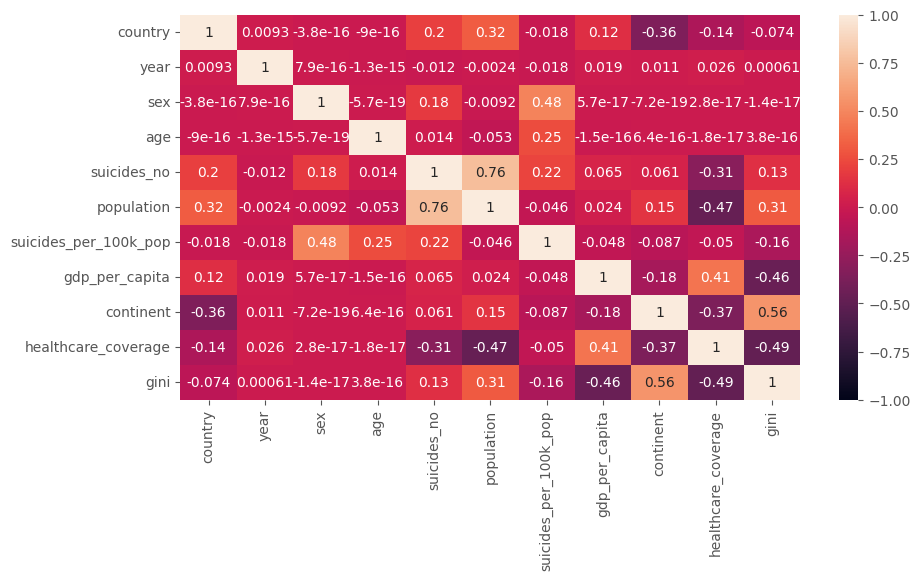

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, ax=ax, vmin=-1, vmax=1)

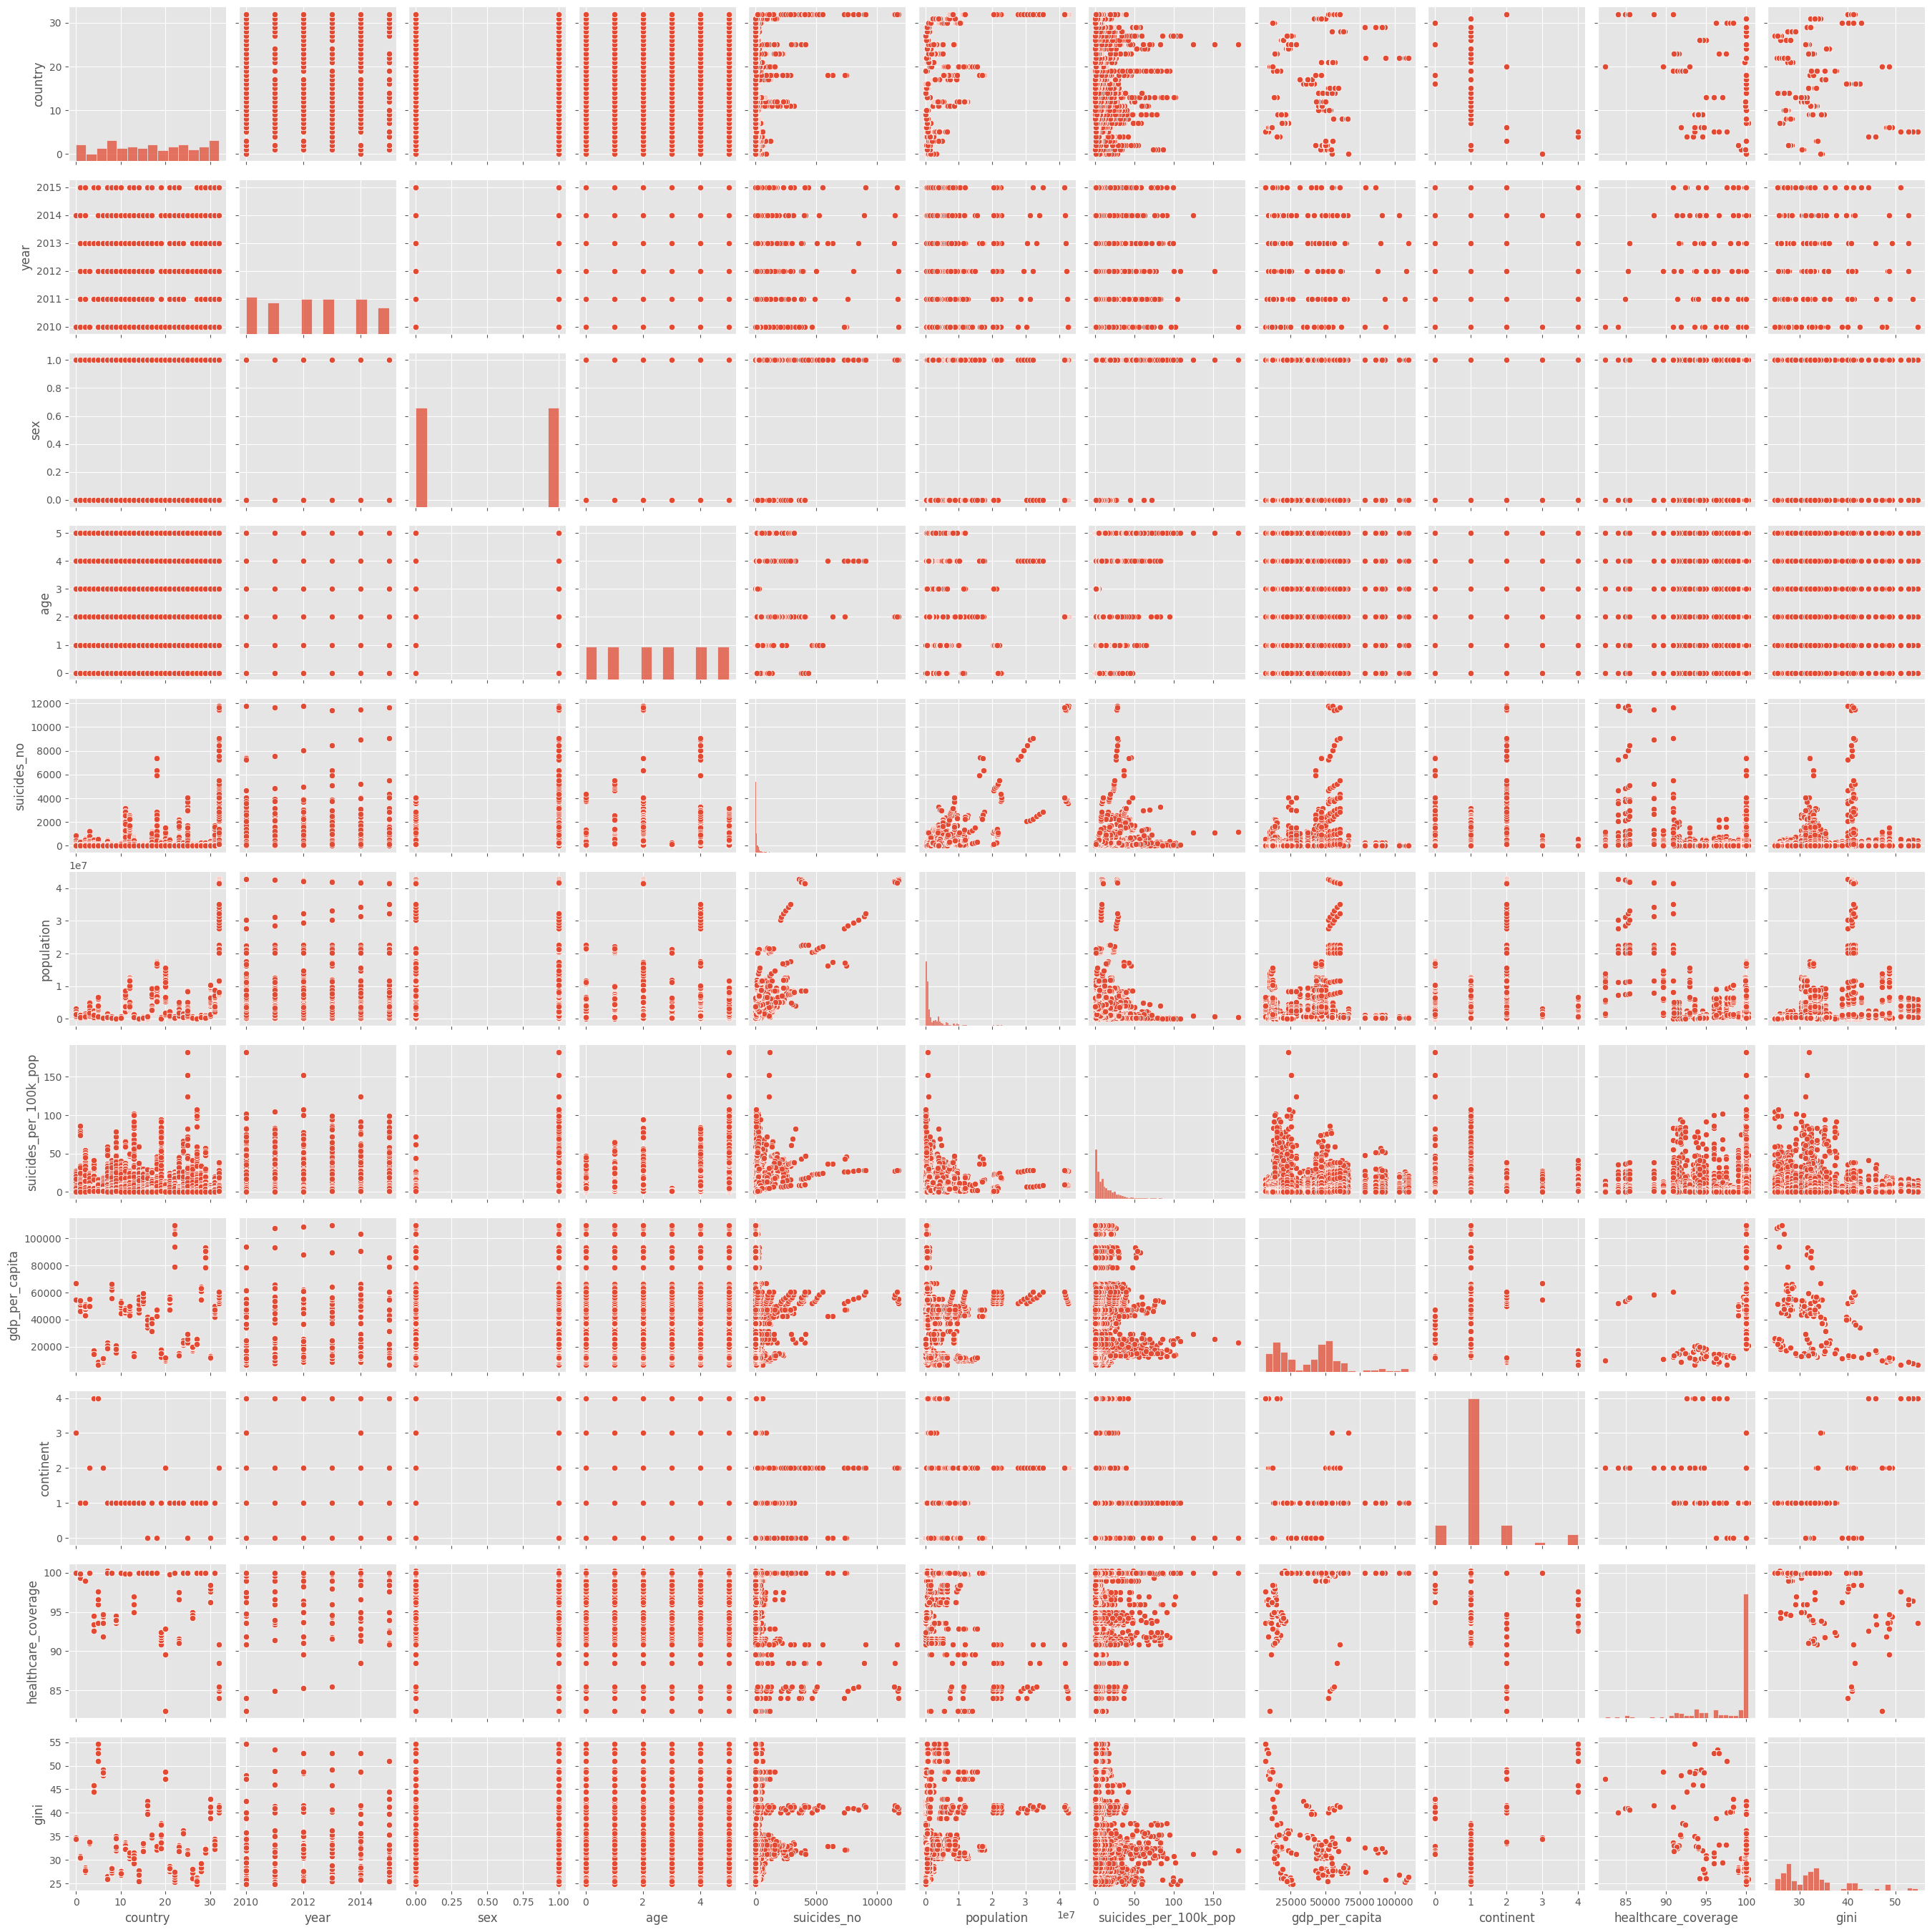

In [6]:
sns.pairplot(df)

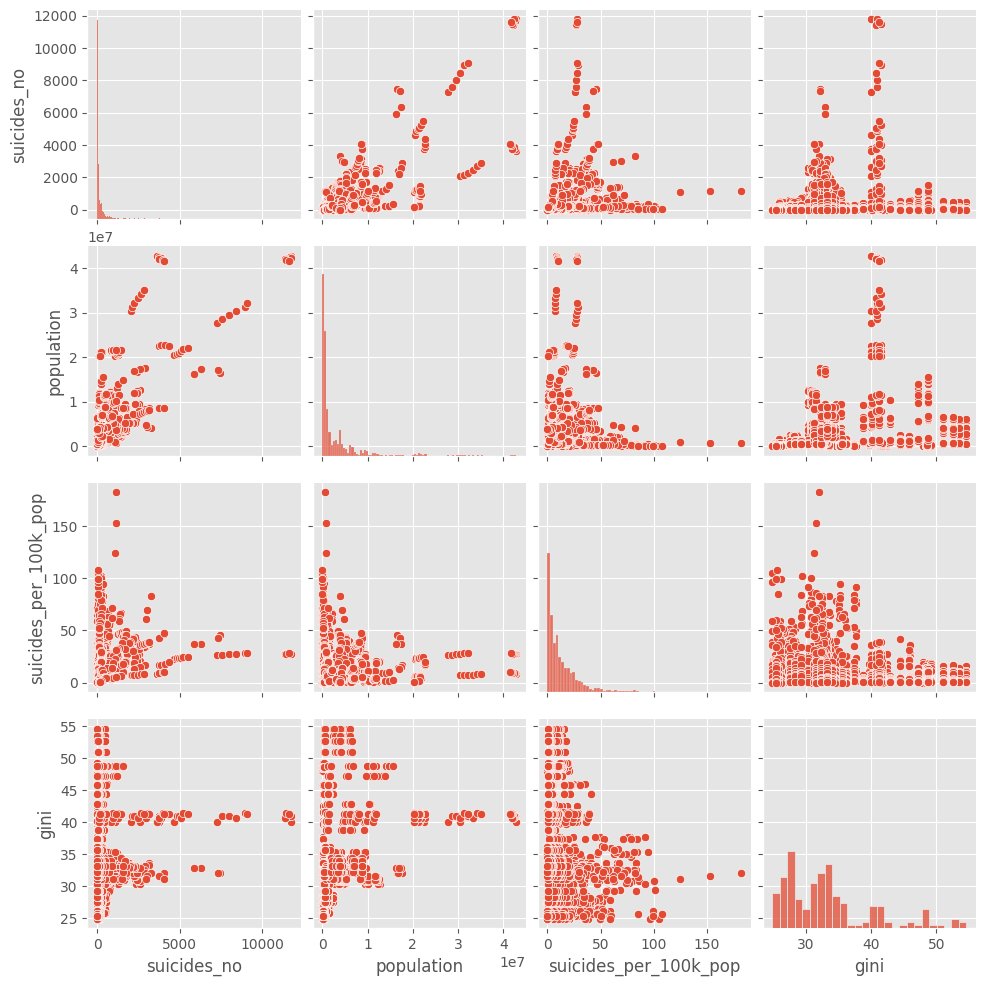

In [14]:
sns.pairplot(df[['suicides_no','population','suicides_per_100k_pop','gini']])

In [22]:
df[df['suicides_no'] < 100]

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year,gdp_per_capita,generation,country_code,continent,healthcare_coverage,gini
6,0,2010,0,1,94,1579905,5.9500000000,"1,144,260,547,873",54887,Generation X,AUS,3,100.0000000000,34.7000000000
7,0,2010,0,5,43,805401,5.3400000000,"1,144,260,547,873",54887,Silent,AUS,3,100.0000000000,34.7000000000
8,0,2010,0,0,80,1521652,5.2600000000,"1,144,260,547,873",54887,Millenials,AUS,3,100.0000000000,34.7000000000
10,0,2010,1,3,7,1420846,0.4900000000,"1,144,260,547,873",54887,Generation Z,AUS,3,100.0000000000,34.7000000000
11,0,2010,0,3,4,1348336,0.3000000000,"1,144,260,547,873",54887,Generation Z,AUS,3,100.0000000000,34.7000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,31,2015,0,3,6,3663221,0.1600000000,"2,885,570,309,161",47240,Generation Z,GBR,1,100.0000000000,33.2000000000
1991,31,2015,1,3,4,3840476,0.1000000000,"2,885,570,309,161",47240,Generation Z,GBR,1,100.0000000000,33.2000000000
2003,32,2010,0,3,87,20250632,0.4300000000,"14,964,372,000,000",51989,Generation Z,USA,2,84.0000000000,40.0000000000
2015,32,2011,0,3,86,20251453,0.4200000000,"15,517,926,000,000",53452,Generation Z,USA,2,84.9000000000,40.9000000000


In [10]:
df[['suicides_no','population','suicides_per_100k_pop']].head(10)

,suicides_no,population,suicides_per_100k_pop
0,816,3076853,26.5200000000
1,151,582009,25.9400000000
2,311,1606526,19.3600000000
3,360,2051197,17.5500000000
4,222,1618860,13.7100000000
5,228,3132534,7.2800000000
6,94,1579905,5.9500000000
7,43,805401,5.3400000000
8,80,1521652,5.2600000000
9,104,2103428,4.9400000000


In [12]:
sn = df['suicides_no'].values[:10]
pop = df['population'].values[:10]
sp = df['suicides_per_100k_pop'].values[:10]
(sn/pop) * 100_000

array([26.52060401, 25.94461598, 19.35854135, 17.5507277 , 13.71335384,
        7.27845252,  5.94972483,  5.33895538,  5.25744388,  4.94430995])